<a href="https://colab.research.google.com/github/gantasrilaitha/cube-color-detection/blob/main/cubecolordetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [31]:
#!pip install opencv-python
#red colour detection
import numpy as np
import cv2


# Capturing image 
webcam = cv2.VideoCapture(0)

# Start a while loop
while(webcam.isOpened()):
    
    # Reading the video from the
    # webcam in image frames
    ret, imageFrame = webcam.read()
   
    # Convert the imageFrame in
    # BGR(RGB color space) to
    # HSV(hue-saturation-value)
    # color space
    hsvFrame = cv2.cvtColor(imageFrame, cv2.COLOR_BGR2HSV)
    cv2.imshow('imageFrame',hsvFrame)

    # Set range for red color and
    # define mask
    red_lower = np.array([136, 97, 111], np.uint8)
    red_upper = np.array([180, 255, 255], np.uint8)
    red_mask = cv2.inRange(hsvFrame, red_lower, red_upper)
    kernel = np.ones((5, 5), "uint8")
    
    # For red color
    red_mask = cv2.dilate(red_mask, kernel)

    # Creating contour to track red color
    contours, hierarchy = cv2.findContours(red_mask,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    
    for pic, contour in enumerate(contours):
        area = cv2.contourArea(contour)
        if(area > 1700):
            x, y, w, h = cv2.boundingRect(contour)
            imageFrame = cv2.rectangle(imageFrame, (x, y),(x + w, y + h),(0, 0, 255), 2)
            
            cv2.putText(imageFrame, "Red Colour", (x, y),cv2.FONT_HERSHEY_SIMPLEX, 1.0,(0, 0, 255)) 
            
    cv2.imshow("RED COLOR DETECTOR", imageFrame)
    if cv2.waitKey(10) & 0xFF == ord('q'):
        webcam.release()
        cv2.destroyAllWindows()
        break

In [32]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


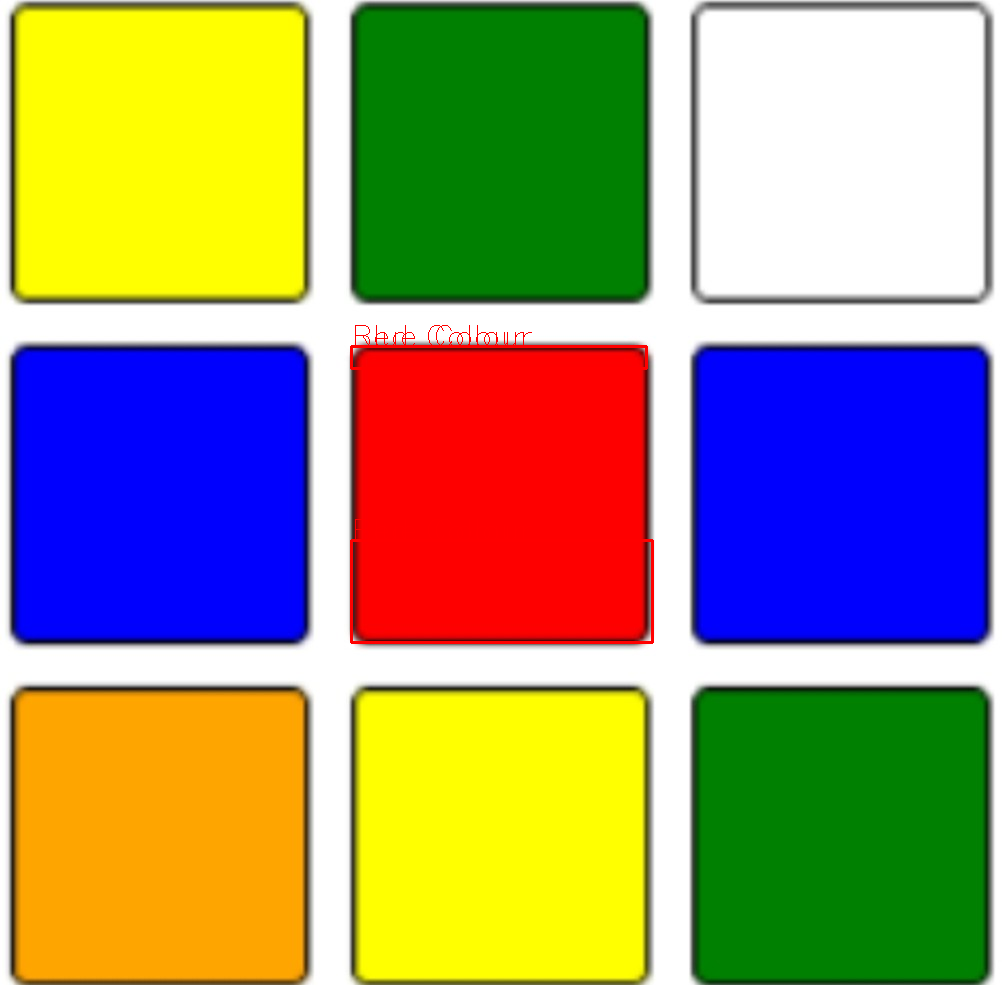

In [46]:
from google.colab.patches import cv2_imshow
import numpy as np
import cv2
image=cv2.imread("/content/drive/MyDrive/cee.jpg")
hsvFrame = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
red_lower = np.array([136, 97, 111], np.uint8)
red_upper = np.array([180, 255, 255], np.uint8)
red_mask = cv2.inRange(hsvFrame, red_lower, red_upper)
    
blue_lower = np.array([110, 50, 50], np.uint8)
blue_upper = np.array([130, 255, 255], np.uint8)
blue_mask = cv2.inRange(hsvFrame, red_lower, blue_upper)

green_lower = np.array([25, 52, 72], np.uint8)
green_upper = np.array([102, 255, 255], np.uint8)
green_mask = cv2.inRange(hsvFrame, red_lower, green_upper)

kernel = np.ones((5, 5), "uint8")
	
    # For red color
red_mask = cv2.dilate(red_mask, kernel)
res_red=cv2.bitwise_and(image,image,mask=red_mask)
#cv2_imshow(res_red)

blue_mask = cv2.dilate(red_mask, kernel)
res_blue=cv2.bitwise_and(image,image,mask=blue_mask)
#cv2_imshow(res_blue)

red_mask = cv2.dilate(red_mask, kernel)
res_red=cv2.bitwise_and(image,image,mask=green_mask)
   

    # Creating contour to track red color
contours, hierarchy = cv2.findContours(red_mask,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
for pic, contour in enumerate(contours):
    area = cv2.contourArea(contour)
    if(area > 500):
        x, y, w, h = cv2.boundingRect(contour)
        image = cv2.rectangle(image, (x, y),(x + w, y + h),(0, 0, 255), 2)
        cv2.putText(image, "Red Colour", (x, y),cv2.FONT_HERSHEY_SIMPLEX, 1.0,(0, 0, 255))

contours, hierarchy = cv2.findContours(blue_mask,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)        
for pic, contour in enumerate(contours):
    area = cv2.contourArea(contour)
    if(area > 300):
        x, y, w, h = cv2.boundingRect(contour)
        image = cv2.rectangle(image, (x, y),(x + w, y + h),(0, 0, 255), 2)
        cv2.putText(image, "Blue Colour", (x, y),cv2.FONT_HERSHEY_SIMPLEX, 1.0,(0, 0, 255))

contours, hierarchy = cv2.findContours(green_mask,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)        
for pic, contour in enumerate(contours):
    area = cv2.contourArea(contour)
    if(area > 300):
        x, y, w, h = cv2.boundingRect(contour)
        image = cv2.rectangle(image, (x, y),(x + w, y + h),(0, 0, 255), 2)
        cv2.putText(image, "Green Colour", (x, y),cv2.FONT_HERSHEY_SIMPLEX, 1.0,(0, 0,255))
            

cv2_imshow(image)
    
if cv2.waitKey(10) & 0xFF == ord('q'):
    image.release()
    cv2.destroyAllWindows()
    
    

